# Learning outcomes
- Geomteric transformation
    - rotation
    - translation
    - affine trnasformation
    - perspective trnasoformation
    
- some basic drawing functions
    - line
    - circle
    - ellipse
    - rectangle
    - text
    
- Bitwise operation
    - OR
    - XOR
    - AND 
    - NOT
    
- Convolution: sliding window performing linear combination
    - Image smoothing (denosing)
    - Sharpening
    - at the hear of CNN
    - Other effects
   
  

# Setup

In [2]:
import sys
assert sys.version_info >= (3, 7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import *

# Geometric transformation
## Translation

In [69]:
img = cv.imread("images/lena.jfif")

h,w = img.shape[:2]
tx = 50
ty = 100
M = np.float32([[1, 0 ,tx],[0,1,ty]])

dst = cv.warpAffine(img, M, (w+tx,h+ty))

show_img(f"translation tx: {tx}, ty: {ty}", dst)

## Rotation

In [70]:
# define M: center, angle and scale
yc, xc = h // 2 , w // 2 

angle = 90 # rotate anti-clockwise

M = cv.getRotationMatrix2D((xc,yc), angle, 1)
dst = cv.warpAffine(img, M, (w,h))

show_img("rotation",dst)

# Custom affine transform

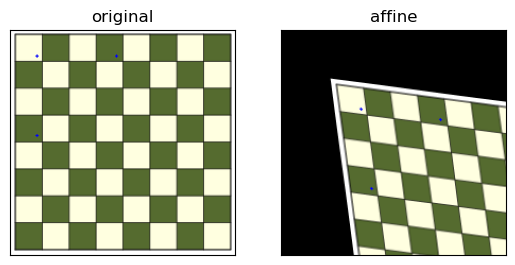

In [83]:
img = cv.imread("images/chessboard.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_copy = img.copy()

h, w = img.shape[:2]

p0 = np.float32([[25, 25], [100, 25], [25, 100]])
p1 = np.float32([[75, 75], [150, 85], [85, 150]])

for pt in p0:
    cv.circle(img, (int(pt[0]), int(pt[1])), 1, (0, 0, 255), -1)
    
M = cv.getAffineTransform(p0, p1)
dst = cv.warpAffine(img, M, (w, h))

plt.subplot(121), plt_img(img, title="original")
plt.subplot(122), plt_img(dst, title="affine")
plt.show()

In [72]:
dst[150, 85, :]

array([  0,   0, 255], dtype=uint8)

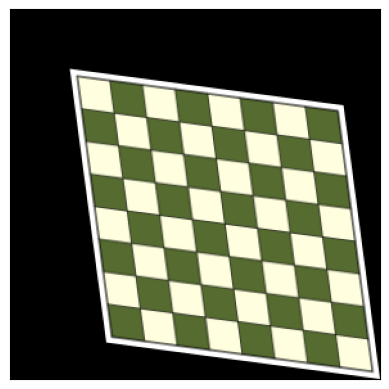

In [73]:
dst_new = cv.warpAffine(img_copy, M, (w+75,h+75))

plt_img(dst_new)

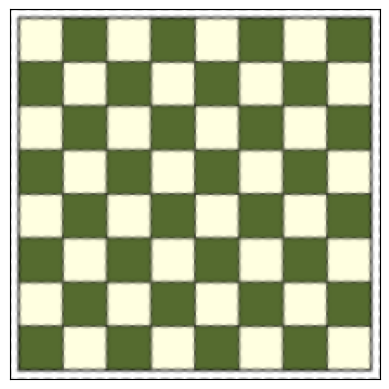

In [74]:
M_inv = cv.getAffineTransform(p1, p0)
ori_restored = cv.warpAffine(dst_new, M_inv, (w, h))

plt_img(ori_restored)

# Perspective transform

In [84]:
img = cv.imread("images/name_card_sample.webp")

show_img("img",img, adjust= True)

In [85]:
# get the 4 points
p = []

def mouse(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x, y))
        p.append((x, y))
        cv.circle(img, (x, y), 2, (0, 0, 255), -1)
        cv.imshow("img", img)

cv.imshow("img", img)        
cv.setMouseCallback("img", mouse)
cv.waitKey(0)
cv.destroyAllWindows()

(524, 464)
(1188, 289)
(1326, 716)
(679, 978)


In [30]:
!pip install scipy

In [77]:
from scipy.spatial.distance import euclidean

In [86]:
w1 = euclidean(p[0], p[1])
w2 = euclidean(p[2], p[3])

h1 = euclidean(p[0], p[3])
h2 = euclidean(p[1], p[2])

W = max(w1, w2)
H = max(h1, h2)

p_arr = np.float32(p)
dst = np.float32([[0, 0], [W-1,0],  [W-1, H-1], [0, H-1]])

M = cv.getPerspectiveTransform(p_arr, dst)
warp = cv.warpPerspective(img_copy, M, (int(W), int(H)))

cv.namedWindow("img", cv.WINDOW_NORMAL)
cv.imshow("img", img_copy)
show_img("warp", warp)

In [88]:
# line 
img = cv.imread("images/dog.jfif")

print(img.shape)

(168, 300, 3)


In [89]:
img_copy = img.copy()

cv.line(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("line", img_copy)

In [90]:
# circle
img_copy = img.copy()

cv.circle(img_copy, (145,50), 40, (0, 0, 255), 2, cv.LINE_AA)
show_img("circle", img_copy)

In [91]:
# ellipse
img_copy = img.copy()
axes = (50, 25)
angle = 0

cv.ellipse(img_copy, (145,50), axes, angle, 0, 360, (100, 0, 100), 2, cv.LINE_AA)
show_img("ellipse", img_copy)

In [95]:
# rectngle
img_copy = img.copy()

cv.rectangle(img_copy, (30, 80), (150, 150), (0, 0, 255), 4, cv.LINE_AA)
show_img("rectangle", img_copy)

In [99]:
# text
img_copy = img.copy()

cv.putText(img_copy, "I am a happy dog!", (15, 145), cv.FONT_HERSHEY_COMPLEX,
            0.65, (200, 0, 50), 2)
show_img("text", img_copy)

### create a custom drawing board
Trackbar function, mouse callback function

In [111]:
WHITE = (255, 255, 255)
RED = (0, 0, 255)
GREEN = (0, 255, 0)
BLUE = (255, 0, 0)

CYAN = (255, 255, 0)
MAGENTA = (255, 0, 255)
YELLOW = (0, 255, 255)

colors = (RED, GREEN, BLUE, CYAN, MAGENTA, YELLOW, WHITE)

#create a trackbar function, mouse callback function, while loop to show template
def nothing(x):
    pass

p0 = p1 = (0, 0)

def mouse(event, x, y, flags, params):
    global p0, p1
    if event == cv.EVENT_LBUTTONDOWN:
        p0 = (x, y)
        
    elif event == cv.EVENT_LBUTTONUP:
        p1 = (x, y)
        
        d = cv.getTrackbarPos(tr1_name, wn)
        if d==0:
            d=-1
        i = cv.getTrackbarPos(tr2_name, wn)
        color = colors[i]
        cv.rectangle(img, p0, p1, color, d)
        cv.imshow(wn, img)

wn = "window"
tr1_name = "thickness"
tr2_name = "color"
img = np.zeros((400, 400, 3), dtype= np.uint8)
cv.namedWindow(wn)
cv.createTrackbar(tr1_name, wn, 0, 10, nothing)
cv.createTrackbar(tr2_name, wn, 0, 6, nothing)
cv.setMouseCallback(wn, mouse)

while (1):
    cv.imshow(wn, img)
    k = cv.waitKey(1) & 0xFF
    if k==27:
        break
        
    if k==ord('c'):
        img[:] = 0
        
cv.destroyAllWindows()

In [113]:
# bulleye
img = np.zeros((400, 400), dtype=np.uint8)

yc, xc = img.shape[0] //2, img.shape[1] //2
radius = np.arange(20, 200, 15)

for r in radius:
    cv.circle(img, (xc, yc), r, 255, 2)
    
cv.putText(img, "Bulleye", (20, 375), cv.FONT_HERSHEY_COMPLEX, 0.65, 255, 2)

show_img("img", img)

## bitwise operation (important to compare the images)


In [11]:
rect = np.zeros((400,400), np.uint8)
rect[30:370, 30:370] = 255

circle = np.zeros((400,400), np.uint8)
cv.circle(circle, (200, 200), 200, 255, -im.1)

cv.imshow("rectangle", rect)
show_img("circle", circle)

In [12]:
# AND
res_AND = cv.bitwise_and(rect, circle)
show_img("AND", res_AND)

In [13]:
# OR
res_OR = cv.bitwise_or(rect, circle)
show_img("OR", res_OR)

In [14]:
# XOR
res_XOR = cv.bitwise_xor(rect, circle)
show_img("XOR", res_XOR)

In [15]:
# NOT
res_NOT = cv.bitwise_not(rect, circle)
show_img("NOT", res_NOT)

In [17]:
#
img = cv.imread("images/dog.jfif")

h, w = img.shape[:2]

mask = np.zeros((h, w), dtype = np.uint8)

cv.circle(mask, (145, 50), 40, 255, -1)

res = cv.bitwise_and(img, img, mask=mask)

show_img("res",res)

# Convolution

In [3]:
# identity kernal
img = cv.imread("images/opencv_logo.png")

kernel = np.zeros((3,3))
kernel[1, 1] = 1
# print(kernel)

dst = cv.filter2D(img, -1, kernel)

cv.imshow("original", img)
show_img("identity", dst)

In [20]:
# sharpening kernel
kernel = np.array([[0, -1, 0],[-1, 5, -1], [0, -1, 0]])

img = cv.imread("images/dog.jfif")

dst = cv.filter2D(img, -1, kernel)

cv.imshow('original', img)
show_img("sharpen", dst)

In [23]:
# blur
kernel = np.ones((5,5)) / 25

blur = cv.filter2D(img, -1, kernel)

dst = cv.addWeighted(img, 1.6, blur, -0.6, 0)

show_img("unsharp_masking", dst)

4 functions to perform image blurring:
- `cv.blur`: mean average filter 
- `cv.GaussianBlur`: Gaussian filter, suitable for gaussian noise
- `cv.medianFilter`: median filter, useful to eliminate salt and pepper noise 
- `cv.bilateralFilter` : edge-preserving filter

## Weekly Activity

In [10]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


1. Rotate image by 45 degrees without cropping the sides of the image. (Hint: There are 2 strategies to tackle these problems). Use "lena.jfif" as the input image.
- Use external libraries imutils.
- Modify the transformation matrix.

In [12]:
import imutils as im

img = cv.imread("images/lena.jfif")

# define M: center, angle and scale
yc, xc = h // 2 , w // 2 

angle = 45 # rotate anti-clockwise

rotated = im.rotate_bound(img, angle)

show_img("rotation",rotated)

2. Use the images with titles: "flower.jfif" and "native-bee.png". I want to put flower above an image. If I add two images, it will change color. If I blend it, I get a transparent effect. But I want it to be opaque. If it was a rectangular region, we could use the ROI as we did in the previous section. But flower is not a rectangular region. This is where bitwise operations, like AND, OR, NOT and XOR really come in handy. The associated functions are cv.bitwise_and(), cv.bitwise_or() and cv.bitwise_not(). You need to use cv.threshold function to segment the flower. Please refer to online documentation for more info. The result should resemble the following:

- cannot

3. Apply custom sharpening kernel of aperture size 3 and 5 as shown below on 'native-bee.png':
$ 3 \times 3 kernel:$
$ \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0\\ \end{bmatrix}$
$ 5 \times 5 kernel:$
$ \begin{bmatrix} -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & 25 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ -1 & -1 & -1 & -1 & -1 \\ \end{bmatrix}$
What can you infer from the outputs?

In [9]:
bee = cv.imread("images/native-bee.png")

kernel_3x3 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, 25, -1, -1],
                       [-1, -1, -1, -1, -1],
                       [-1, -1, -1, -1, -1]])

sharpened_3x3 = cv.filter2D(bee, -1, kernel_3x3)
sharpened_5x5 = cv.filter2D(bee, -1, kernel_5x5)

cv.imshow("Original", bee)
show_img("Sharpened 3x3", sharpened_3x3)
show_img("Sharpened 5x5", sharpened_5x5)

3x3 is sharpen
5x5 is more sharpen than 3x3 result, but it contains of more noises

4. Apply different image smoothing techniques (e.g. average filter, Gaussian kernel and median filter) on 'noise_lena.jpg' and display the resulting images after the convolution. Comment on the outcomes and deduce the type of noise present on the image.

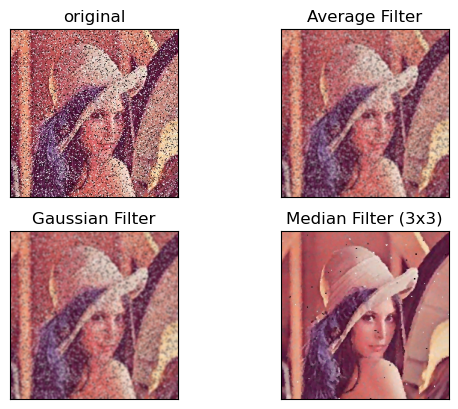

In [24]:
# Load the image
img = cv.imread("images/noise_lena.jpg")

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

avg_filtered = cv.blur(img, (3, 3))
gaussian_filtered = cv.GaussianBlur(img, (5, 5), 0)
median_filtered = cv.medianBlur(img, 3)

plt.subplot(2,2,1), plt_img(img, title="original")
plt.subplot(2,2,2), plt_img(avg_filtered, title="Average Filter")
plt.subplot(2,2,3), plt_img(gaussian_filtered, title="Gaussian Filter")
plt.subplot(2,2,4), plt_img(median_filtered, title="Median Filter (3x3)")

plt.show()


- like salt and pepper noise because median blur more clear
